# Word Vector

- In natural language processing, we represent each word as a vector consisting of numbers. The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine learning models.

- Predict analogies between words.
- Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
- Compare word embeddings by using a similarity measure (the cosine similarity).
- Understand how these vector space models work.

## 1 - Predict the Countries from Capitals

## 2 - Plotting the vectors using PCA

You can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$). 
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

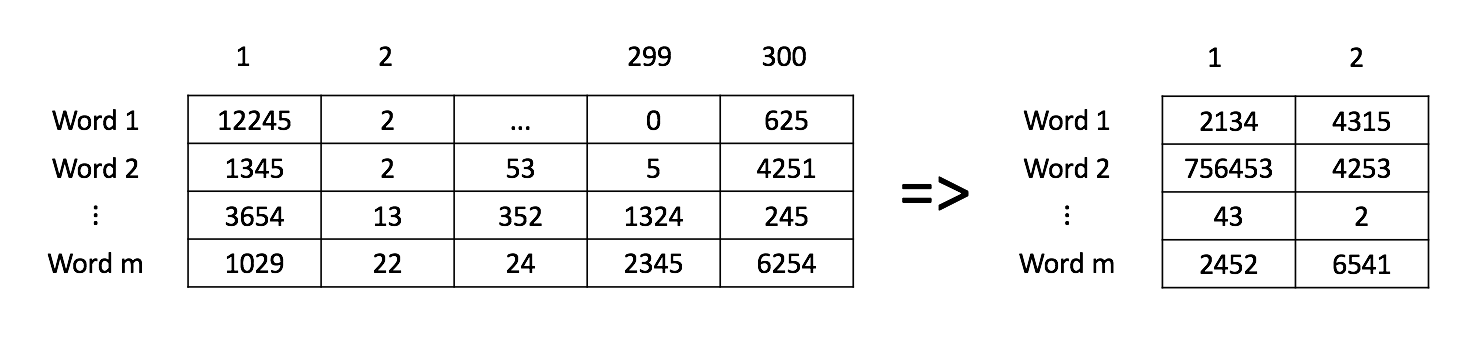

In [2]:
# Run this cell to import packages.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./data/capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
print(data.head(5))

word_embeddings = pickle.load(open("./data/word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

    city1 country1    city2     country2
0  Athens   Greece  Bangkok     Thailand
1  Athens   Greece  Beijing        China
2  Athens   Greece   Berlin      Germany
3  Athens   Greece     Bern  Switzerland
4  Athens   Greece    Cairo        Egypt


243

## Function

### 1. Cosine Similarity

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector. Note that if A and B are identical, you will get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $cos(\theta) = -1$.
* If you get $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1 and 0 indicate a dissimilarity score.

1. Compute the dot product :

```python
    dot = np.dot(A, B)
```

2. Compute the norm : 

```python 
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
```

3. Compute the cosine similarity :

```python
    cos = dot / (norma * normb)
```

In [5]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    dot = np.dot(A, B)
    
    # Compute the norm (magnitude) 
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    
    # Compute the cosine similarity defined by formula
    cos = dot / (norma * normb)

    return cos

### 2. Euclidean Distance

You will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors. 
* The more similar the words, the more likely the Euclidean distance will be close to 0. 

1. Calculate the vector difference

```python
    diff = A - B
```

2. Calculate the Euclidean distance

```python
    d = np.linalg.norm(diff)
```

In [6]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """
    # Calculate the vector difference
    diff = A - B
    
    # Calculate the Euclidean distance
    d = np.linalg.norm(diff)

    return d

### 3. Get country : get_country

1. Store the city1, country 1, and city 2 in a set called group

```python
    group = {city1, country1, city2}
```

2. Get embeddings of city and country 1 and city 2

```python
    city1_emb = embeddings[city1]
    country1_emb = embeddings[country1]
    city2_emb = embeddings[city2]
```

3. Get embedding of country 2

```python
    vec = city2_emb - city1_emb + country1_emb
```

4. Initialize :
    - the similarity to -1, because it will take the value of cosin (-1, 1) ==> at the end similarity will be close to 1
    - country to an empty string
    
```python
    similarity = -1 
    country = ''
```

5. Loop over embeddings

```python
    for word in embeddings.keys():
```

5. 1. Check that the word is not already in the 'group'

```python
        if word not in group:
```

5. 1.1. Get the word embedding

```python
            word_emb = embeddings[word]
```

5. 1.2. Calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary

```python
            cur_similarity = cosine_similarity(vec, word_emb)
```

5. 1.3. If the cosine similarity is more similar than the previously best similarity, update the similarity to the new, better similarity

```python
            if cur_similarity > similarity:
                similarity = cur_similarity
```

5. 1.4. Store the country as a tuple, which contains the word and the similarity
```python
                country = (word, similarity)
```


In [9]:
def get_country(city1, country1, city2, embeddings, cosine_similarity=cosine_similarity):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their emmbeddings
    Output:
        country: a tuple with the most likely country and its similarity score
    """
    group = {city1, country1, city2}

    city1_emb = embeddings[city1]
    country1_emb = embeddings[country1]
    city2_emb = embeddings[city2]

    vec = city2_emb - city1_emb + country1_emb

    similarity = -1 
    country = ''

    for word in embeddings.keys():

        if word not in group:
            word_emb = embeddings[word]
            cur_similarity = cosine_similarity(vec, word_emb)

            if cur_similarity > similarity:
                similarity = cur_similarity
                country = (word, similarity)

    return country

### 4. Model Accuracy

Now you will test your new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$

1. Initialize num_correct to zero

```python
    num_correct = 0  
```

2. Loop through the rows of the dataframe

```python
    for i, row in data.iterrows():
```

3. Extract city1, country1, city2, and country2 from the row

```python
        city1 = row['city1']
        country1 = row['country1']
        city2 = row['city2']
        country2 = row['country2']
```

4. Use get_country to find the predicted country2

    - Note: get_country function returns a tuple (predicted_country, similarity_score), We only need the predicted_country for accuracy calculation

```python
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)
```

5. Check if the prediction is correct and increment num_correct

```python
        if predicted_country2 == country2:
            num_correct += 1  
```

6. get the number of rows in the data dataframe, and calculate the accuracy by dividing the number correct by m

```python
    m = len(data)
    accuracy = num_correct / m
```


In [10]:
def get_accuracy(word_embeddings, data, get_country=get_country):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas DataFrame containing all the country and capital city pairs

    '''
    num_correct = 0  

    for i, row in data.iterrows():
        city1 = row['city1']
        country1 = row['country1']
        city2 = row['city2']
        country2 = row['country2']

        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        if predicted_country2 == country2:
            num_correct += 1  

    m = len(data)
    accuracy = num_correct / m

    return accuracy

### 5. Compute PCA 

* The word vectors are of dimension 300. 
* Use PCA to change the 300 dimensions to `n_components` dimensions. 
* The new matrix should be of dimension `m, n_components`. 

**Steps**

* Get a subset of the eigenvectors (choose how many principle components you want to use using n_components).
* Return the new transformation of the data by multiplying the eigenvectors with the original data.

1. Mean center the data / de-mean the data

```python
    X_demeaned = X - np.mean(X,axis=0)
```

2. Calculate the covariance matrix

```python
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
```

3. Calculate eigenvectors & eigenvalues of the covariance matrix
    - Using `linalg.eigh`.  Use 'eigh' rather than 'eig' since R is symmetric.  The performance gain when using eigh instead of eig is substantial.
```python
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
```

4. Sort eigenvalue in increasing order (get the indices from the sort)

```python
    idx_sorted = np.argsort(eigen_vals)
```

5. Reverse the order so that it's from highest to lowest.

```python
    idx_sorted_decreasing = idx_sorted[::-1]

```

6. Sort the eigen values by idx_sorted_decreasing

```python
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
```

7. Sort eigenvectors using the idx_sorted_decreasing indices

```python
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]
```

8. Select the first n eigenvectors (n is desired dimension of rescaled data array, or dims_rescaled_data)

```python
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]
```

9. Transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data, Then take the transpose of that product.

```python
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()
```

In [12]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    X_demeaned = X - np.mean(X,axis=0)
    
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    
    idx_sorted = np.argsort(eigen_vals)
    idx_sorted_decreasing = idx_sorted[::-1]
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]
    
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

    return X_reduced

### 6. Get Vectors

In [25]:
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word 
        fr_embeddings:
        words: a list of words
    Output: 
        X: a matrix where the rows are the embeddings corresponding to the rows on the list
        
    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X


## Test

In [26]:
king = word_embeddings['king']
queen = word_embeddings['queen']

print(cosine_similarity(king, queen))
print(euclidean(king, queen))

0.6510956
2.4796925


In [27]:
get_country('Paris', 'France', 'Berlin', word_embeddings)

('Germany', 0.78837556)

In [28]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


In [29]:
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


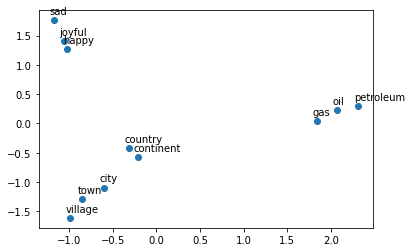

In [30]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()